## Dominik Adamczyk
### Mownit Lab6 rozwiązania

### Zadanie 1 (1p)
- Korzytając z pakietu <a href="https://github.com/JuliaMath/Polynomials.jl">Polynomials</a> zaimplementuj wielomiany Legendre'a zdefiniowane w taki sposób:

$P_{0}(x)=1$

$P_{1}(x)=x$

$P_{k+1}(x)=\frac{2k+1}{k+1} x P_{k}(x)-\frac{k}{k+1}P_{k-1}(x)$

- narysuj ich wykresy w przedziale (-1,1). 
- sprawdź(np. za pomocą fukcji <i>roots</i> z pakietu Polynomials), że ich zera  sa odciętymi punktów Gaussa. Test wykonaj dla wielomianow od 2 do 4 stopnia
- podaj związek tego faktu z podstawowym twierdzeniem kwadratur Gaussa (z wykładu)

In [29]:
using Polynomials
using Plots
function get_n_legendre(n)
    P = Array{Polynomial}(undef, n)
    P[1] = Polynomial([1])
    if n > 1
        P[2] = Polynomial([0, 1])
        for k in 3:n
            P[k] = (2*k-3)/(k-1)*P[2]*P[k-1] - (k-2)/(k-1)*P[k-2]
        end
    end
    return P
end


get_n_legendre (generic function with 1 method)

In [2]:
P = get_n_legendre(10)

10-element Vector{Polynomial}:
 Polynomial(1)
 Polynomial(x)
 Polynomial(-0.5 + 1.5*x^2)
 Polynomial(-1.5*x + 2.5*x^3)
 Polynomial(0.375 - 3.75*x^2 + 4.375*x^4)
 Polynomial(1.8750000000000002*x - 8.75*x^3 + 7.875*x^5)
 Polynomial(-0.3125 + 6.5625*x^2 - 19.687499999999996*x^4 + 14.4375*x^6)
 Polynomial(-2.1875*x + 19.6875*x^3 - 43.31249999999999*x^5 + 26.8125*x^7)
 Polynomial(0.2734375 - 9.84375*x^2 + 54.140625*x^4 - 93.84374999999999*x^6 + 50.2734375*x^8)
 Polynomial(2.4609375*x - 36.09375*x^3 + 140.765625*x^5 - 201.09374999999997*x^7 + 94.9609375*x^9)

In [3]:
function plot_legandre(n, x_range=(-1.0,1.0))
    P = get_n_legendre(n)
    x = range(x_range[1], x_range[2], length=100)
    y = [P[i].(x) for i in 1:n]
    l = reshape(["P$(i-1)" for i in 1:n], 1, n)
    plot(x, y, label=l, xlabel = "x", ylabel= "y", title = "Legendre Polynomials")
end

plot_legandre (generic function with 2 methods)

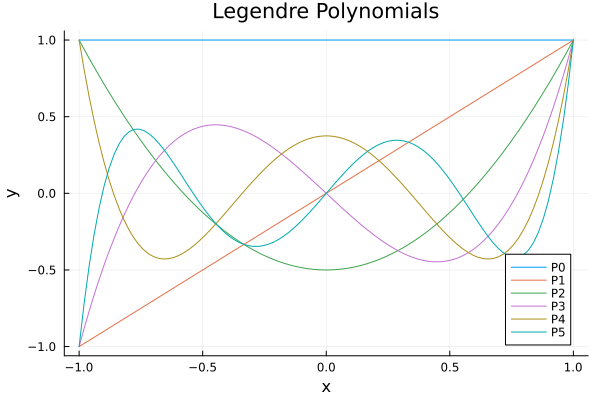

In [4]:
plot_legandre(6)

In [5]:
using QuadGK
function compare_legrenge_gauss(minval, maxval)
    minval += 1
    maxval += 1
    L = get_n_legendre(maxval)
    for i in minval:maxval
        println("N value:    ", i-1)
        Lroots = roots(L[i])
        sort!(Lroots)
        println("Legrange:   ", Lroots)
        (a, c) = gauss(Float64, i-1)
        sort!(a)
        println("Gauss:      ", a)
        println("Difference: ", Lroots - a)
        println("")
    end
end

compare_legrenge_gauss(2, 4)

    

N value:    2


Legrange:   

[-0.5773502691896258, 0.5773502691896256]
Gauss:      [-0.5773502691896258, 0.5773502691896258]
Difference: [0.0, -2.220446049250313e-16]

N value:    3
Legrange:   [-0.7745966692414834, 0.0, 0.7745966692414835]
Gauss:      [-0.7745966692414834, 0.0, 0.7745966692414834]
Difference: [0.0, 0.0, 1.1102230246251565e-16]

N value:    4
Legrange:   [-0.8611363115940536, -0.33998104358485653, 0.3399810435848563, 0.8611363115940531]
Gauss:      [-0.8611363115940526, -0.3399810435848563, 0.3399810435848563, 0.8611363115940526]
Difference: [-9.992007221626409e-16, -2.220446049250313e-16, 0.0, 5.551115123125783e-16]



##### Wynika to z podstawowego twierdzenia o kwadraturach Gaussa

Odcięte $x_i$ n-punktowej kwadratury Gaussa z funcką ważącą $w(x)$ w $[a, b]$ są zerami wielomianu ortogonalnego $\phi_n(x)$ dla tego samego przedziału i tej samej funkcji ważącej.

Wielomiany Legendre'a są ortogonalne z wagą $p(x)=1$ na odcinku $[-1,1]$, co wpisuje się w powyższe twierdzenie

### Zadanie 2 (1p)
- Napisz funkcję, która dla podanej liczby punktów Gaussa $k$ oraz funkcji $f$  policzy $\int_{-1}^{1} f dx$
metodą używającą funkcji:
```julia
gauss(k)
```
oraz sumy 
```julia
sum(a .* f.(xp)) 
```
- przetestuj dla wielomianów coraz większych stopni
- sprawdz kiedy przestaje być dokładna, 
- podaj związek z twierdzeniem o  stopniu dokładności kwadratury Gaussa 

In [6]:
function gauss_integral(f, k)
    xp, a = gauss(k)
    return sum(a .* f.(xp)) 
end

gauss_integral (generic function with 1 method)

In [7]:
random_polynomials = [Polynomial(rand(1:10, i)) for i in 2:11]
integrals = [Polynomials.integrate(pol) for pol in random_polynomials]
fields = [pol(1) - pol(-1) for pol in  integrals]

10-element Vector{Float64}:
  8.0
 16.666666666666668
 15.333333333333332
 13.466666666666669
  9.066666666666666
  6.59047619047619
 14.952380952380953
 12.488888888888889
 33.46031746031746
 15.237518037518038

In [8]:
using DataFrames
diff = DataFrame(PolynomialDegree=Int64[], k1Acc=Float64[],
k2Acc=Float64[], k3Acc=Float64[], k4Acc=Float64[], k5Acc=Float64[])
for (i, poly) in enumerate(random_polynomials)
    field = fields[i]
    push!(diff, vcat([i],
    [round(abs(field-gauss_integral(poly, k))*100/field,digits=2)
    for k in 1:5]))
end
println("Relative error (in precents) of integrals values computed\nwith gauss squares method, compared with exact values")
display(diff)
# gauss_integral(random_polynomials[3], 2)

Row,PolynomialDegree,k1Acc,k2Acc,k3Acc,k4Acc,k5Acc
,Int64,Float64,Float64,Float64,Float64,Float64
1,1,0.0,0.0,0.0,0.0,0.0
2,2,28.0,0.0,0.0,0.0,0.0
3,3,8.7,0.0,0.0,0.0,0.0
4,4,25.74,9.24,0.0,0.0,0.0
5,5,33.82,1.96,0.0,0.0,0.0
6,6,69.65,25.82,2.08,0.0,0.0
7,7,73.25,23.21,2.45,0.0,0.0
8,8,67.97,26.26,3.19,0.09,0.0
9,9,40.23,16.91,3.57,0.35,0.0


Relative error (in precents) of integrals values computed
with gauss squares method, compared with exact values


Metoda całkowania przestaje być dokładna, gdy dla wielomianu stopnia $n$ używamy kwadratury ze współczynnikiem $k$ mniejszym bądź równym $n/2$

Wiąże się to z twierdzeniem o stopniu dokładności kwadratury Gaussa:

Kwadratura ma stopień dokładności $2n-1$ dla $n$ punktowej kwadratury.

Jest to widoczne na powyższej tabeli - przykładowo dla wielomianu stopnia 7 wyniki dokładne uzyskiwane są dla kwadratur większych od $n=3$

### Zadanie 3 (1p)
  
Skorzystaj z rozwiązania zadania 2 do napisania funkcji 
liczącej  całki w dowolnym przedziale $\int_{a}^{b} f(x) dx$ 

dokonując normalizacji  do $\int_{-1}^{1} F(z) dz$ 

podstawiając:

$x=\frac{b+a}{2}+ \frac{b-a}{2} z $ oraz 

$dx =\frac{b-a}{2} dz $

Przetestuj działanie na kilku przykładach i sprawdź z wynikami otrzymanymi analitycznie.

In [9]:
function gauss_integral_ab(f, a, b, k)
    F(z) = f((b-a)/2 * z + (b+a)/2) * (b-a)/2
    return gauss_integral(F, k) 
end

gauss_integral_ab (generic function with 1 method)

In [10]:
diffab = DataFrame(Function=String[], a=Float16[], b=Float16[], k1Acc=Float64[],
k2Acc=Float64[], k3Acc=Float64[], k4Acc=Float64[], k5Acc=Float64[])
functions = [exp, cos, x -> x^2, x -> 1/sqrt(x), x -> 2*x^3/(5x^4 + 12x^2)]
names = ["exp(x)", "cos(x)", "x^2", "1/sqrt(x)", "2*x^3/(5x^4 + 12x^2)"]
as = [0, -1, -10, 5, 0.5]
bs = [3,  8, -4,  7, 10.33]
vals = [19.08553692318767, 1.830829231431278,
312, 0.8193666671296018, 0.7435573652097997]
for (i, fun) in enumerate(functions)
    # println(i)
    field = vals[i]
    a = as[i]
    b = bs[i]
    push!(diffab, vcat([names[i], a, b],
    [round(abs(field-gauss_integral_ab(fun, a, b, k))*100/field,digits=2)
    for k in 1:5]))
end
println("Relative error (in precents) of integrals values computed\nwith gauss squares method, compared with exact values")
display(diffab)

Row,Function,a,b,k1Acc,k2Acc,k3Acc,k4Acc,k5Acc
,String,Float16,Float16,Float64,Float64,Float64,Float64,Float64
1,exp(x),0.0,3.0,29.55,1.44,0.03,0.0,0.0
2,cos(x),-1.0,8.0,560.34,294.01,63.84,6.68,0.41
3,x^2,-10.0,-4.0,5.77,0.0,0.0,0.0,0.0
4,1/sqrt(x),5.0,7.0,0.35,0.0,0.0,0.0,0.0
5,2*x^3/(5x^4 + 12x^2),0.5,10.33,9.73,6.31,2.99,0.47,0.06


Relative error (in precents) of integrals values computed
with gauss squares method, compared with exact values


### Zadanie 4 (1p)
Głowną funkcją pakietu QuadGK jest adaptacyjna funkcja <a href="https://juliamath.github.io/QuadGK.jl/stable/#QuadGK.quadgk"> guadgk</a> używająca całkowania  Gauss-Kronroda

- użyj tej funkcji do policzenia  całki dla przykładowego wielomianu.
- funkcja ta ma możliwość liczenia również całek do nieskończoności.


 Policz całkę od minus do plus nieskonczonosci 
 standardowego rozkładu normalnego Gaussa
$ \frac{1}{\sqrt{2\pi}}exp(\frac{-x^2}{2})$

In [11]:
example1 = Polynomial([1, 2, 3, pi, 10, 11, sqrt(5*pi), 1.222])
v, e = quadgk(example1, -1.1, 0.333)

(1.3216088606222367, 2.220446049250313e-16)

In [12]:
diffquad = DataFrame(Function=String[], a=Float16[], b=Float16[], value=Float64[], error=Float64[])
functions = [exp, cos, x -> x^2, x -> 1/sqrt(x), x -> 2*x^3/(5x^4 + 12x^2)]
names = ["exp(x)", "cos(x)", "x^2", "1/sqrt(x)", "2*x^3/(5x^4 + 12x^2)"]
as = [0, -1, -10, 5, 0.5]
bs = [3,  8, -4,  7, 10.33]
vals = [19.08553692318767, 1.830829231431278,
312, 0.8193666671296018, 0.7435573652097997]
for (i, fun) in enumerate(functions)
    # println(i)
    field = vals[i]
    a = as[i]
    b = bs[i]
    (v, e) = quadgk(fun, a, b)
    push!(diffquad, vcat([names[i], a, b],
    [v, e]))
end
display(diffquad)

Row,Function,a,b,value,error
,String,Float16,Float16,Float64,Float64
1,exp(x),0.0,3.0,19.0855,4.32721e-12
2,cos(x),-1.0,8.0,1.83083,4.4352e-10
3,x^2,-10.0,-4.0,312.0,0.0
4,1/sqrt(x),5.0,7.0,0.819367,2.22045e-16
5,2*x^3/(5x^4 + 12x^2),0.5,10.33,0.743557,4.53689e-9


In [13]:
gauss_distribution(x) = 1/sqrt(2*pi) * exp(-x^2/2)
(v, e) = quadgk(gauss_distribution, -Inf, Inf)

(1.0000000000032583, 1.4395584886006938e-8)

Wartość wyniku jest taka jak oczekiwana (1) w granicach błędu

### Zadanie 5 (3p)
Napisz własne funkcje całkujące -  w wybranym przedziale (a,b) - złożonymi metodami prostokątów, trapezów oraz Simpsona. Dla stałego przedziału zwiększaj liczbę użytych punktów (n). Narysuj wykresy funkcji błędu  w stosunku do wyniku otrzymanego analitycznie, 
w zależnosci od $h=\frac{b-a}{n}$:
1. wykładniczej
2. trygonometrycznej (np. sin (x) w przedziale $[0,2\pi]$)

In [14]:
function rectangle_integration(f, a, b, n)
    dx = (b-a)/n
    sum = 0.0
    for i in 1:n
        x = a+(i-0.5)*dx
        sum += f(x)*dx
    end
    return sum
end

rectangle_integration (generic function with 1 method)

In [15]:
rectangle_integration(sin, 0, pi, 10)

2.0082484079079745

In [16]:
function trapezoid_integration(f, a, b, n)
    dx = (b-a)/n
    sum = 0.0
    for i in 1:n
        x1 = a + (i - 1) * dx
        x2 = a + i * dx
        sum += (f(x1) + f(x2)) * dx * 0.5
    end
    return sum
end

trapezoid_integration (generic function with 1 method)

In [17]:
trapezoid_integration(sin, 0, pi, 10)

1.9835235375094546

In [18]:

function simpson_integration(f, a, b, n)
    v1  = 0
    v2 = 0
    dx = (b - a) / n 
    for i in 1:(n-1)
        x = a + i * dx
        v2 += f(x - dx / 2)
        v1 += f(x)
    end
    v2 += f(a + n * dx - dx / 2)
    return dx / 6 * (f(a) + f(b) + 2 * v1+ 4 * v2)
end

simpson_integration (generic function with 1 method)

In [19]:
simpson_integration(sin, 0, pi, 10)

2.0000067844418012

In [20]:
sin_accuracy = DataFrame(type=String[], h=Float64[], error=Float64[])
a=0
b=pi
correct=2.0
for i in 10:2:50
    h=(b-a)/i
    push!(sin_accuracy, ["rectangle", h, abs(correct-rectangle_integration(sin, a, b, i))])
    push!(sin_accuracy, ["trapezoid", h, abs(correct-trapezoid_integration(sin, a, b, i))])
    push!(sin_accuracy, ["Simpson", h, abs(correct-simpson_integration(sin, a, b, i))])
end
display(sin_accuracy)

Row,type,h,error
,String,Float64,Float64
1,rectangle,0.314159,0.00824841
2,trapezoid,0.314159,0.0164765
3,Simpson,0.314159,6.78444e-6
4,rectangle,0.261799,0.00572302
5,trapezoid,0.261799,0.0114362
6,Simpson,0.261799,3.26888e-6
7,rectangle,0.224399,0.00420243
8,trapezoid,0.224399,0.00839957
9,Simpson,0.224399,1.7635e-6


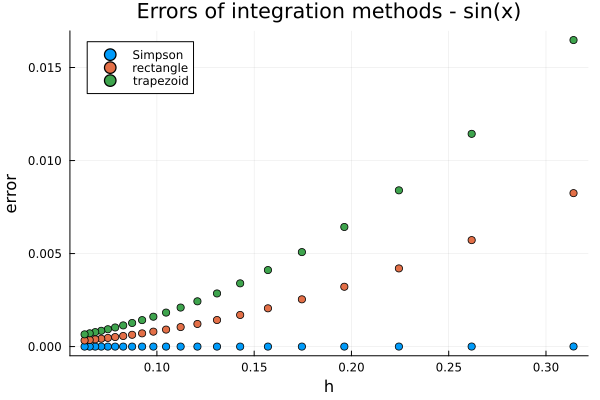

In [28]:
scatter(sin_accuracy.h, sin_accuracy.error, group=sin_accuracy.type,
title="Errors of integration methods - sin(x)",
xlabel="h", ylabel="error")

In [22]:
exp_accuracy = DataFrame(type=String[], h=Float64[], error=Float64[])
a=0
b=sqrt(30)
correct=29.83859239828491
f(x) = exp(sqrt(x))
for i in 10:2:50
    h=(b-a)/i
    push!(exp_accuracy, ["rectangle", h, abs(correct-rectangle_integration(f, a, b, i))])
    push!(exp_accuracy, ["trapezoid", h, abs(correct-trapezoid_integration(f, a, b, i))])
    push!(exp_accuracy, ["Simpson", h, abs(correct-simpson_integration(f, a, b, i))])
end
display(exp_accuracy)

Row,type,h,error
,String,Float64,Float64
1,rectangle,0.547723,0.00380308
2,trapezoid,0.547723,0.0422391
3,Simpson,0.547723,0.0115443
4,rectangle,0.456435,0.00424085
5,trapezoid,0.456435,0.0348621
6,Simpson,0.456435,0.00879345
7,rectangle,0.39123,0.00420032
8,trapezoid,0.39123,0.0293545
9,Simpson,0.39123,0.00698461


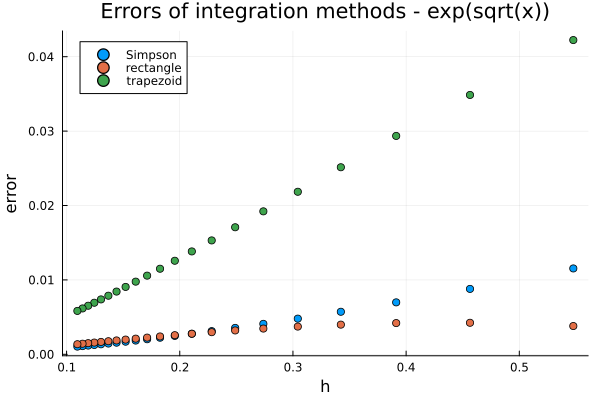

In [27]:
scatter(exp_accuracy.h, exp_accuracy.error, group=exp_accuracy.type,
title="Errors of integration methods - exp(sqrt(x))",
xlabel="h", ylabel="error")